We will start by importing libaries we will need

In [34]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import csv


There are two data frames we are interested in both from a website https://www.tomato.gg/
This website is a gaint online source of world of tank data. Offering both player and vehicle data. 
We will scape data from these webpages and turn them into dataframes.

IMPORTANT!!!
There are two main data tables we are interested in the first is generl information the next deals with the tank economy.
The website is updated on a almost weekly basis. This may cause the get request to fail when it is down for maintaince it could also mean the names or labels of revant columns and data are changed. This can be an issue as variable names could be altered making the code not preform as expected.
In order to address this I decided to scape the page once and write the output to a text file. I used the data from this text file in my project.
The text file is up to date as off April 2023 which will suffice for my primary purpose.
Below I have provided the code I used to scape the webpage. 
This may not always work for the reasons stated above this is fine as project is will work with the text file. 
The code below demonstates the inital scaping process.

In [35]:
url = "https://www.tomato.gg/tank-stats/NA"


response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


script = soup.find("script", {"id": "__NEXT_DATA__"})

if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]
    
    
    fieldnames = set()
    for obj in initial_data:
        fieldnames.update(obj.keys())

    # Specify the filename for the CSV
    filename = "output.csv"

    # Write JSON objects to CSV with UTF-8 encoding
    with open(filename, mode="w", newline="", encoding="utf-8") as file:  # Specify UTF-8 encoding
        writer = csv.DictWriter(file, fieldnames=list(fieldnames))
        writer.writeheader()
        writer.writerows(initial_data)   
else:
    print("Error data not found")



In [36]:
url = "https://www.tomato.gg/economics/all"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

script = soup.find("script", {"id": "__NEXT_DATA__"})
if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]['data']

    fieldnames = set()
    for obj in initial_data:
        fieldnames.update(obj.keys())
        
    filename = "output.csv"

    with open(filename, mode="w", newline="", encoding="utf-8") as file:  # Specify UTF-8 encoding
        writer = csv.DictWriter(file, fieldnames=list(fieldnames))
        writer.writeheader()
        writer.writerows(initial_data)  
    
else:
    print("Error data not found")

We will now contruct the dataframes with the data from the two older text files

In [37]:
generalDf = pd.read_csv('rawDataOutput/generalData.csv', encoding='utf')
generalDf

,damage_received,survival,damage_received_from_invisible,life_time,nation,player_winrate,winrate,image,isPrem,class,...,frags,penetrations,base_capture_points,distance_traveled,hit_rate,name,tracking_assist,potential_damage_received,pen_rate,damage
0,1085,27.44,353,297,France,51.46,53.36,https://api.worldoftanks.com/static/2.66.0/wot...,True,MT,...,0.98,4.30,0.48,1812,74.13,Bourrasque,52,1052,76.34,1391
1,928,30.85,401,341,Germany,49.05,48.96,https://api.worldoftanks.com/static/2.66.0/wot...,True,TD,...,0.81,2.90,0.71,1248,63.42,Skorpion G,43,886,73.59,1264
2,782,23.45,250,269,France,50.28,50.58,https://api.worldoftanks.com/static/2.66.0/wot...,True,LT,...,0.55,2.91,0.97,1741,72.56,ELC EVEN 90,23,761,78.22,593
3,842,34.90,345,358,USSR,49.74,49.72,https://api.worldoftanks.com/static/2.66.0/wot...,True,TD,...,0.91,3.04,0.84,1195,64.04,SU-130PM,44,784,73.70,1386
4,1507,28.56,457,316,France,49.38,50.34,https://api.worldoftanks.com/static/2.66.0/wot...,True,MT,...,0.91,4.33,0.62,1679,75.65,Char Futur 4,62,1599,74.59,1539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,1362,14.46,487,309,USA,48.80,49.86,https://api.worldoftanks.com/static/2.66.0/wot...,True,MT,...,0.48,3.40,1.37,1428,66.24,T95E2,40,1843,59.87,777
558,1251,29.85,281,320,Czech,58.50,59.85,https://api.worldoftanks.com/static/2.66.0/wot...,True,HT,...,0.81,6.07,0.10,1200,71.72,Škoda T 45,32,1809,71.65,1257
559,1791,15.56,508,299,China,0.00,0.00,https://api.worldoftanks.com/static/2.71.0/wot...,True,HT,...,0.78,3.89,0.00,1280,72.46,BZ-58-2,16,2631,70.00,1835
560,541,33.33,65,226,Germany,62.79,65.38,https://api.worldoftanks.com/static/2.66.0/wot...,True,MT,...,1.17,8.17,0.00,1151,81.82,Pz. V/IV A,0,712,90.74,909


In [38]:
economicDF = pd.read_csv('rawDataOutput/econData.csv', encoding='utf')
economicDF

,cost_per_shot,image,tank_id,avg_consumables_cost,avg_profit,avg_ammo_cost,tier,nation,earnings_per_minute,class,isPrem,avg_earnings,avg_repair_cost,name,battles,profit_per_minute
0,1618,https://api.worldoftanks.com/static/2.66.0/wot...,58625,7542,59913,14155,8,USSR,14721,TD,True,86598,4987,ISU-130,106,10184
1,1613,https://api.worldoftanks.com/static/2.66.0/wot...,51313,665,55578,25856,7,Czech,15255,HT,True,88126,6025,Škoda T 45,112,9621
2,770,https://api.worldoftanks.com/static/2.66.0/wot...,43585,11578,52118,8386,8,France,18029,LT,True,76992,4909,EBR 75 FL 10,8905,12204
3,3536,https://api.worldoftanks.com/static/2.66.0/wot...,52049,11610,50884,32916,8,UK,18754,HT,True,102353,6941,Charlemagne,702,9323
4,2047,https://api.worldoftanks.com/static/2.71.0/wot...,56065,5997,50730,19510,8,USSR,16563,HT,True,82829,6590,Peregrine,2840,10144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,3895,https://api.worldoftanks.com/static/2.71.0/wot...,62513,13345,-29768,48374,10,China,11100,HT,True,58606,26656,113 BO,1003,-5638
661,3681,https://api.worldoftanks.com/static/2.66.0/wot...,6225,16296,-32234,48503,10,UK,10013,HT,True,55666,23100,FV215b,1589,-5798
662,378,https://api.worldoftanks.com/static/2.66.0/wot...,51729,3100,-36263,67756,3,Germany,7835,LT,True,35285,692,Pz. II J,799,-8052
663,4543,https://api.worldoftanks.com/static/2.66.0/wot...,46849,20418,-36446,57214,10,USSR,12734,HT,True,67138,25952,Obj. 279 (e),19611,-6912


These DF have a lot of data we don't need so we will trim some of the columns we don't need.


In [39]:
print(generalDf.columns)

generalDf = generalDf.drop(columns='image')
generalDf = generalDf.drop(columns='sniper_damage')
generalDf = generalDf.drop(columns='frags')
generalDf = generalDf.drop(columns='tracking_assist')
generalDf = generalDf.drop(columns='shots_fired')
generalDf = generalDf.drop(columns='direct_hits')
generalDf = generalDf.drop(columns='penetrations')
generalDf = generalDf.drop(columns='damage_received_from_invisible')
generalDf = generalDf.drop(columns='potential_damage_received')
generalDf = generalDf.drop(columns='base_capture_points')
generalDf = generalDf.drop(columns='base_defense_points')
generalDf = generalDf.drop(columns='life_time')
generalDf = generalDf.drop(columns='distance_traveled')
generalDf = generalDf.drop(columns='difference')


print(generalDf.columns)


Index(['damage_received', 'survival', 'damage_received_from_invisible',
       'life_time', 'nation', 'player_winrate', 'winrate', 'image', 'isPrem',
       'class', 'difference', 'tier', 'damage_blocked', 'battles',
       'shots_fired', 'spots', 'tank_id', 'direct_hits', 'sniper_damage',
       'spotting_assist', 'base_defense_points', 'wn8', 'frags',
       'penetrations', 'base_capture_points', 'distance_traveled', 'hit_rate',
       'name', 'tracking_assist', 'potential_damage_received', 'pen_rate',
       'damage'],
      dtype='object')
Index(['damage_received', 'survival', 'nation', 'player_winrate', 'winrate',
       'isPrem', 'class', 'tier', 'damage_blocked', 'battles', 'spots',
       'tank_id', 'spotting_assist', 'wn8', 'hit_rate', 'name', 'pen_rate',
       'damage'],
      dtype='object')


In [40]:
print(economicDF.columns)

economicDF = economicDF.drop(columns='image')
economicDF = economicDF.drop(columns='avg_consumables_cost')
economicDF = economicDF.drop(columns='earnings_per_minute')
economicDF = economicDF.drop(columns='profit_per_minute')

print(economicDF.columns)


Index(['cost_per_shot', 'image', 'tank_id', 'avg_consumables_cost',
       'avg_profit', 'avg_ammo_cost', 'tier', 'nation', 'earnings_per_minute',
       'class', 'isPrem', 'avg_earnings', 'avg_repair_cost', 'name', 'battles',
       'profit_per_minute'],
      dtype='object')
Index(['cost_per_shot', 'tank_id', 'avg_profit', 'avg_ammo_cost', 'tier',
       'nation', 'class', 'isPrem', 'avg_earnings', 'avg_repair_cost', 'name',
       'battles'],
      dtype='object')


Lets start by examing the average win rates betweeen premium and non premium tanks

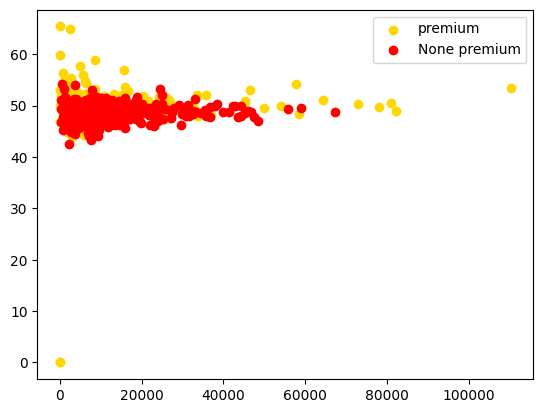

In [41]:
premiumGeneral = generalDf[generalDf['isPrem'] == True]
stdGeneral = generalDf[generalDf['isPrem'] == False]

plt.scatter(premiumGeneral['battles'], premiumGeneral['winrate'], label = "premium", color = 'gold')
plt.scatter(stdGeneral['battles'], stdGeneral['winrate'], label = "None premium", color = 'red')
plt.legend()
plt.show()

Looking at this plot we see that there is an out liner which alters the shape of the graph.
Indeed the number of battles can skew results greatly. For example if a tank is only played in 3 games and wins all 3 games it would have a 100% win rate. This is not quite telling of the tanks overall preformance. As such lets chop off tanks that have less than 1000 games played total.
Lets also increase tranparency to better see the data.

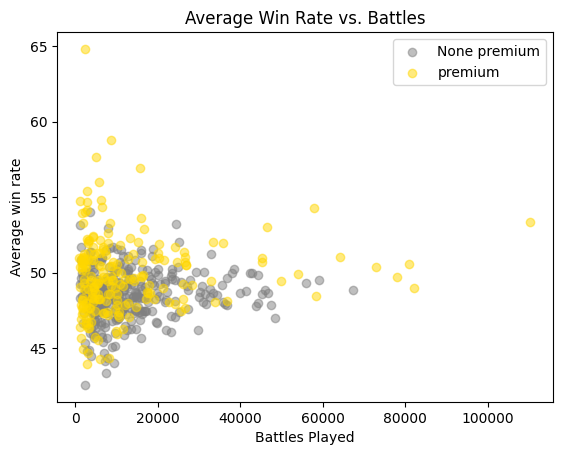

In [42]:
tempDf = generalDf[generalDf['battles'] >= 1000]
premiumGeneral = tempDf[tempDf['isPrem'] == True]
stdGeneral = tempDf[tempDf['isPrem'] == False]


plt.scatter(stdGeneral['battles'], stdGeneral['winrate'], label = "None premium", color = 'gray', alpha=0.5)
plt.scatter(premiumGeneral['battles'], premiumGeneral['winrate'], label = "premium", color = 'gold', alpha=0.5)

plt.title('Average Win Rate vs. Battles')
plt.xlabel('Battles Played')
plt.ylabel('Average win rate')

plt.legend()
plt.show()


Lets now look at how tank economies work.
It is known that premium tanks earn more money per battle compared to standard ones

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


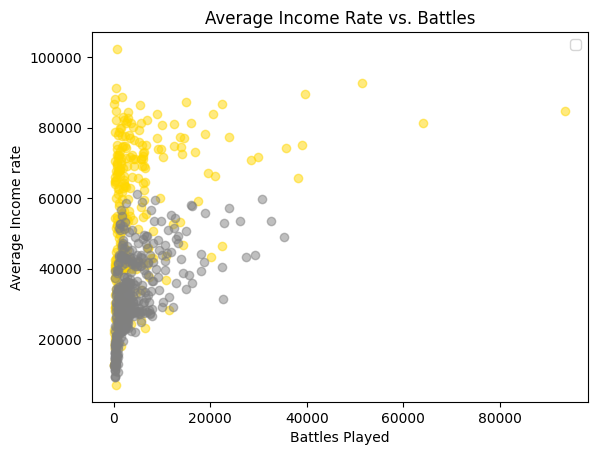

In [43]:
premiumEcon = economicDF[economicDF['isPrem'] == True]
stdEcon = economicDF[economicDF['isPrem'] == False]

plt.scatter(premiumEcon['battles'], premiumEcon['avg_earnings'], color = 'gold', alpha=0.5)
plt.scatter(stdEcon['battles'], stdEcon['avg_earnings'], color = 'gray', alpha=0.5)


plt.title('Average Income Rate vs. Battles')
plt.xlabel('Battles Played')
plt.ylabel('Average Income rate')

plt.legend()
plt.show()